## Importing and Cleaning Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv("diabetes.csv")

In [44]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
df.duplicated().sum()

0

## EDA and Feature Engineering

<Axes: >

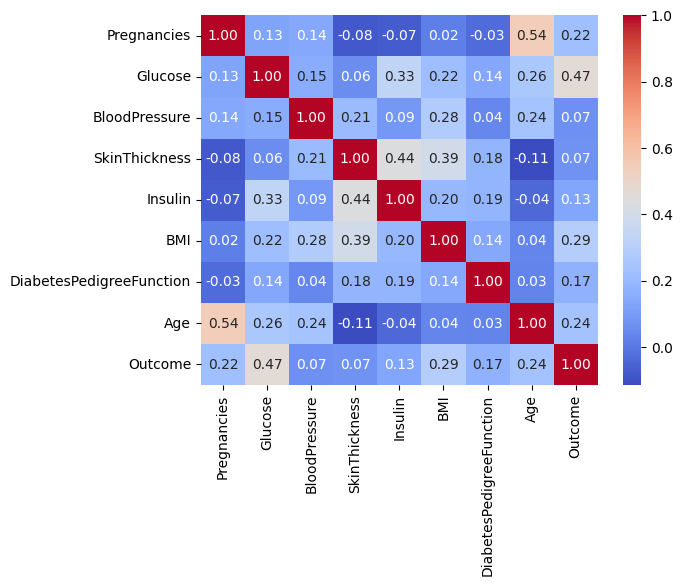

In [49]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [50]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

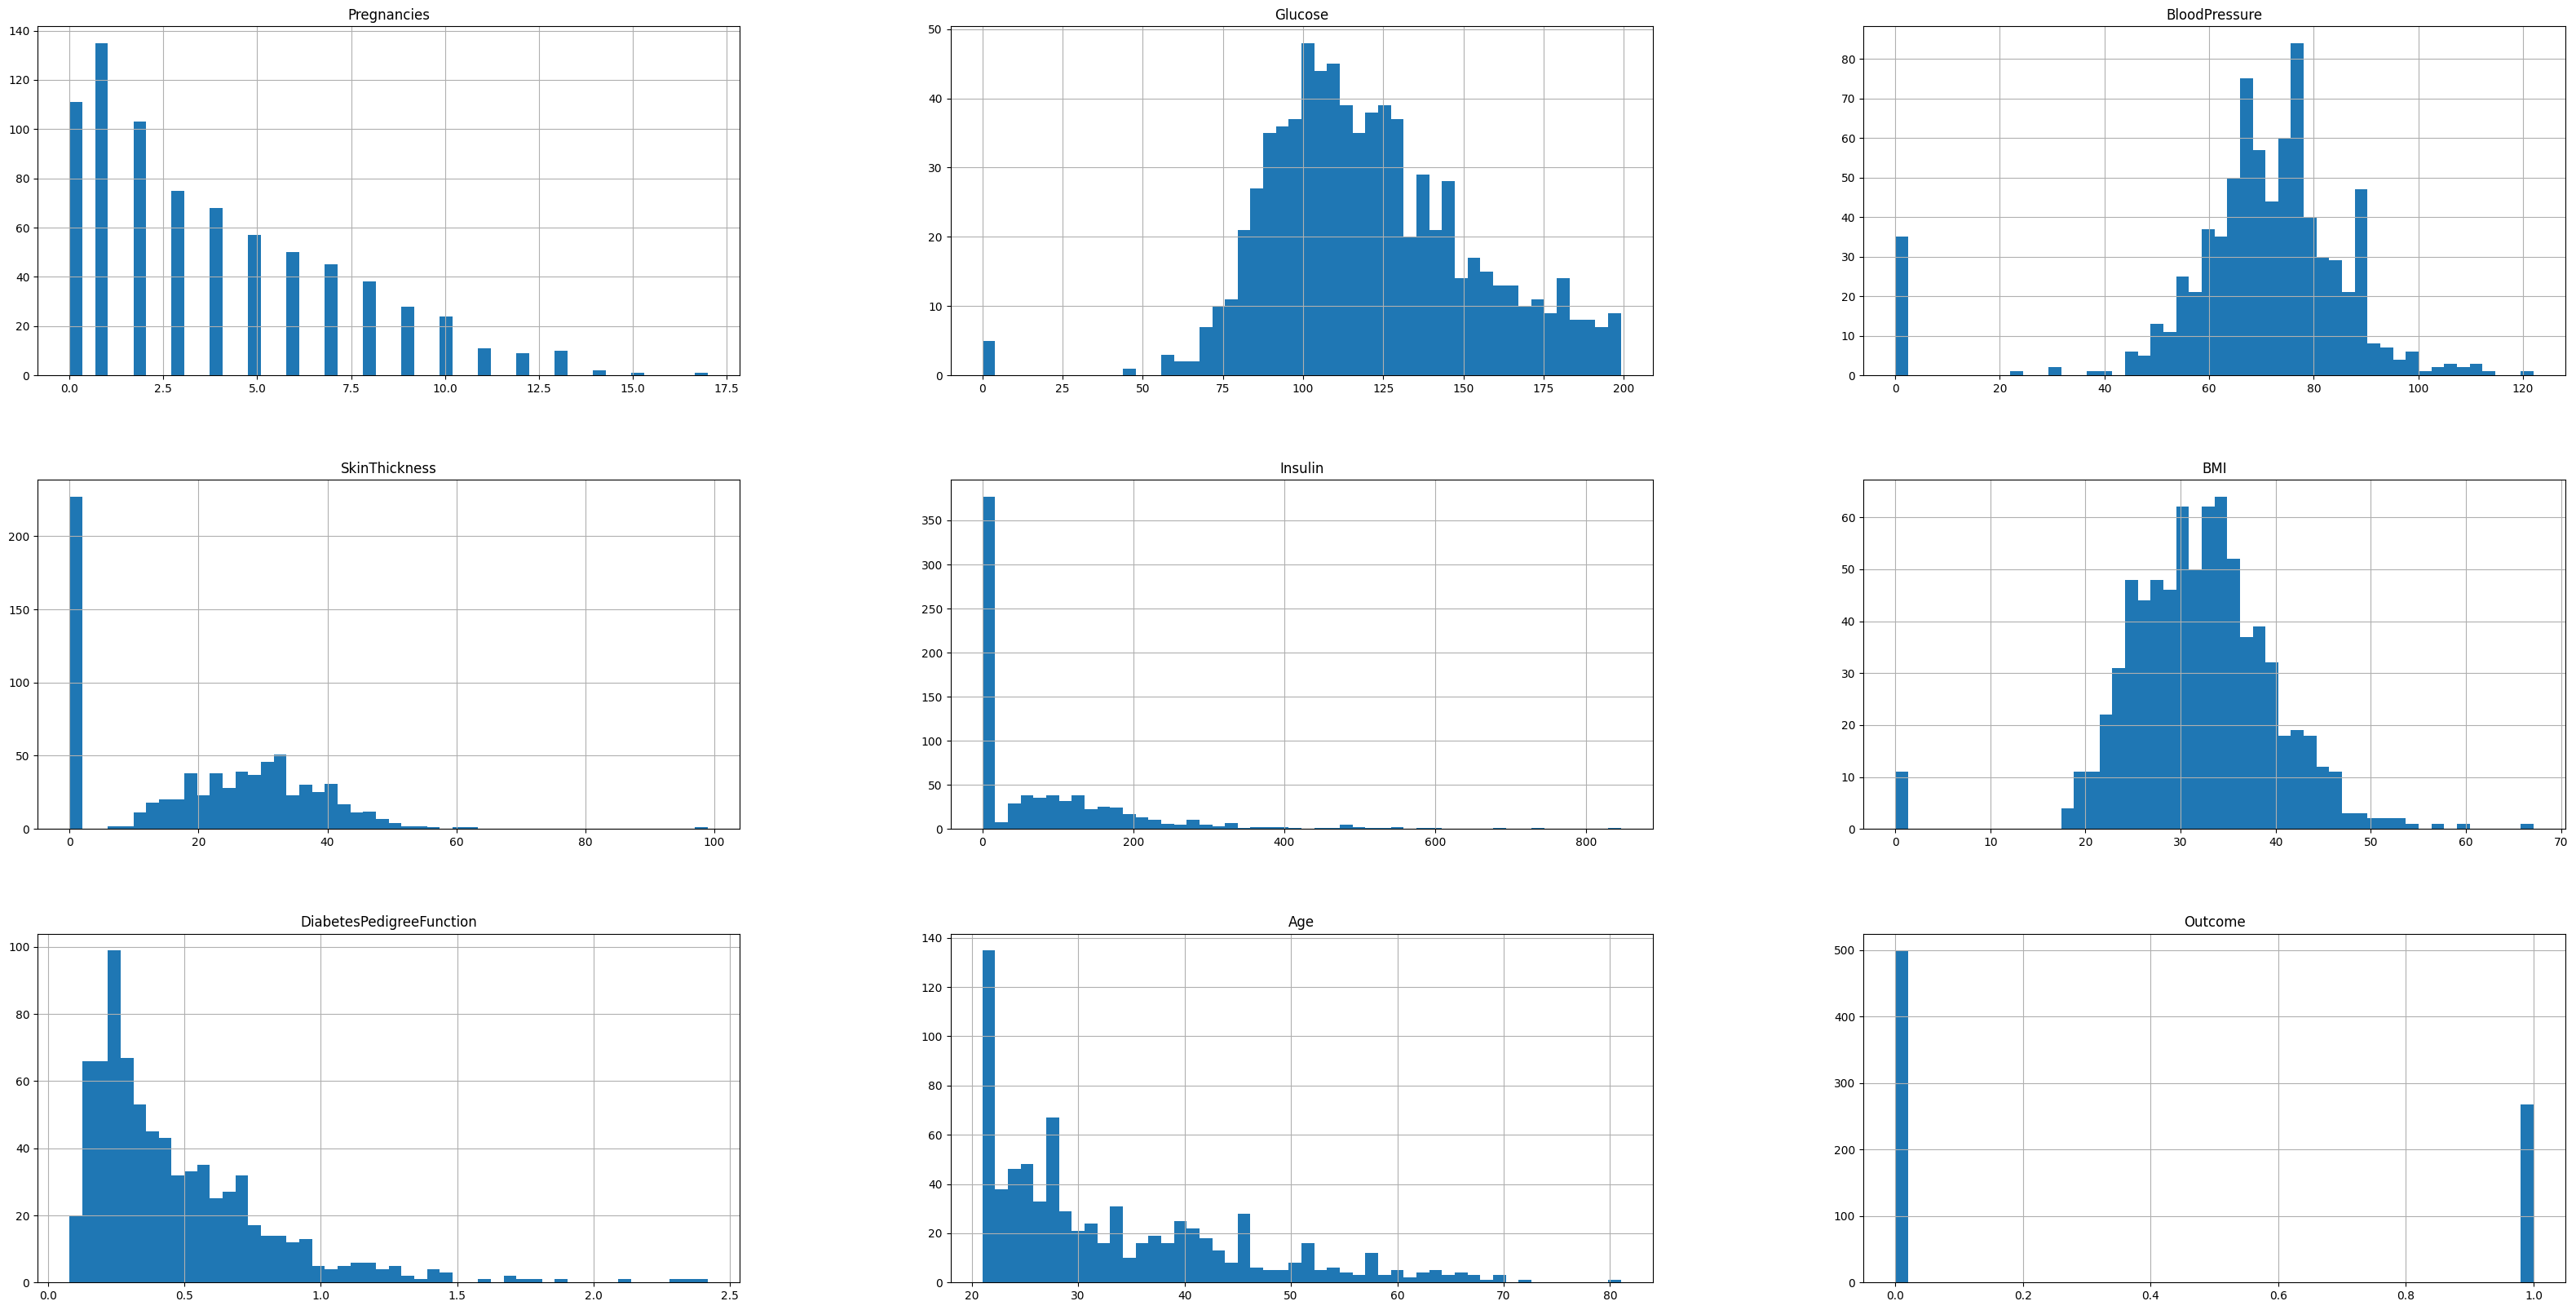

In [51]:
df.hist(bins=50, figsize=(40,20))

### Dropping outliers

In [52]:
new_df=df[df['Pregnancies']<11]
new_df=new_df[new_df['BMI']<70]
new_df=new_df[new_df['BloodPressure']>40]
new_df=new_df[new_df['SkinThickness']<90]

In [53]:
df=new_df.copy()

### Dropping missing values

In [54]:
new_df=df[df['Pregnancies']<11]
new_df=new_df[new_df['BMI']<60]
new_df=new_df[new_df['BloodPressure']>30]
new_df=new_df[new_df['SkinThickness']<80]

In [55]:
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [56]:
new_df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.462948
BMI                         0.277150
Age                         0.240549
Pregnancies                 0.221827
BloodPressure               0.172231
DiabetesPedigreeFunction    0.163889
Insulin                     0.134421
SkinThickness               0.068917
Name: Outcome, dtype: float64

In [57]:
def compare_correlation(df1, df2):
    """
    Compare the correlation of two dataframes with the 'Outcome' column.
    
    Args:
    - df1 (pd.DataFrame): First dataframe.
    - df2 (pd.DataFrame): Second dataframe.
    
    Returns:
    - None. Plots the comparative study.
    """
    # Compute the correlation matrices
    corr_matrix1 = df1.corr()
    corr_matrix2 = df2.corr()
    
    # Select only the correlation with the 'Outcome' column
    corr_outcome1 = corr_matrix1['Outcome'].drop('Outcome')
    corr_outcome2 = corr_matrix2['Outcome'].drop('Outcome')
    
    # Create a comparative dataframe
    corr_df = pd.DataFrame({'New DF': corr_outcome1, 'Old DF': corr_outcome2})
    
    # Plot the comparative study
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Comparative Study of Correlations with Outcome')
    plt.show()

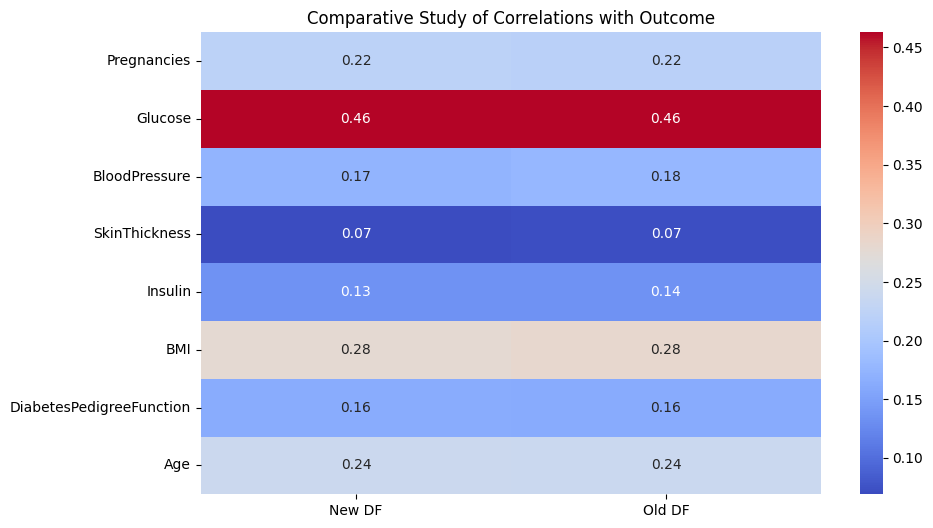

In [58]:
compare_correlation(new_df, df)

In [59]:
df=new_df.copy()

### Dropping missing values

In [60]:
df_dropped = df.copy()

df_dropped = df_dropped[df_dropped['Insulin']!=0]
df_dropped = df_dropped[df_dropped['Glucose']!=0]
df_dropped = df_dropped[df_dropped['BMI']!=0]
df_dropped = df_dropped[df_dropped['SkinThickness']!=0]

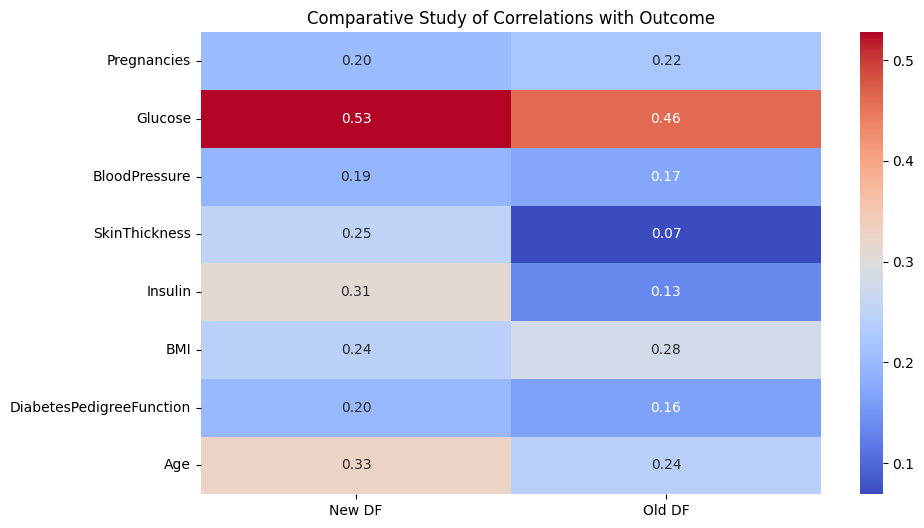

In [61]:
compare_correlation(df_dropped, df)

In [62]:
df_dropped = df.copy()

df_dropped = df_dropped[df_dropped['Insulin']!=0]
df_dropped = df_dropped[df_dropped['Glucose']!=0]
df_dropped = df_dropped[df_dropped['BMI']!=0]
df_dropped = df_dropped[df_dropped['SkinThickness']!=0]

In [63]:
df = df_dropped.copy()

### Imputing with mean

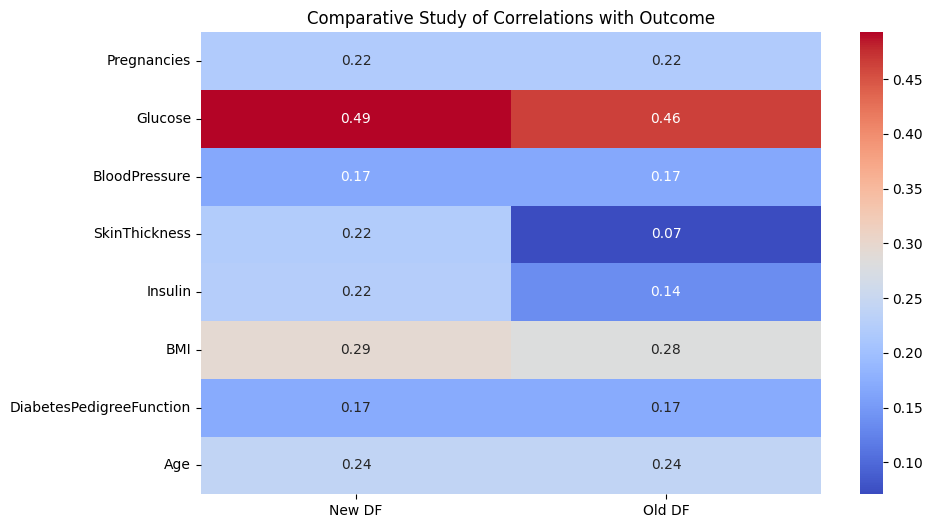

In [20]:
def impute_mean(df):
    # Calculate means
    mean_insulin = df.loc[df['Insulin'] != 0, 'Insulin'].mean()
    mean_glucose = df.loc[df['Glucose'] != 0, 'Glucose'].mean()
    mean_bmi = df.loc[df['BMI'] != 0, 'BMI'].mean()
    mean_skin_thickness = df.loc[df['SkinThickness'] != 0, 'BMI'].mean()

    new_df = df.copy()
    
    # Impute 0 values
    new_df.loc[new_df['Insulin'] == 0, 'Insulin'] = mean_insulin
    new_df.loc[new_df['SkinThickness'] == 0, 'SkinThickness'] = mean_skin_thickness
    new_df.loc[new_df['Glucose'] == 0, 'Glucose'] = mean_glucose
    new_df.loc[new_df['BMI'] == 0, 'BMI'] = mean_bmi

    return new_df

df_impute_mean = impute_mean(df)
compare_correlation(df_impute_mean, df)

### Imputing with median

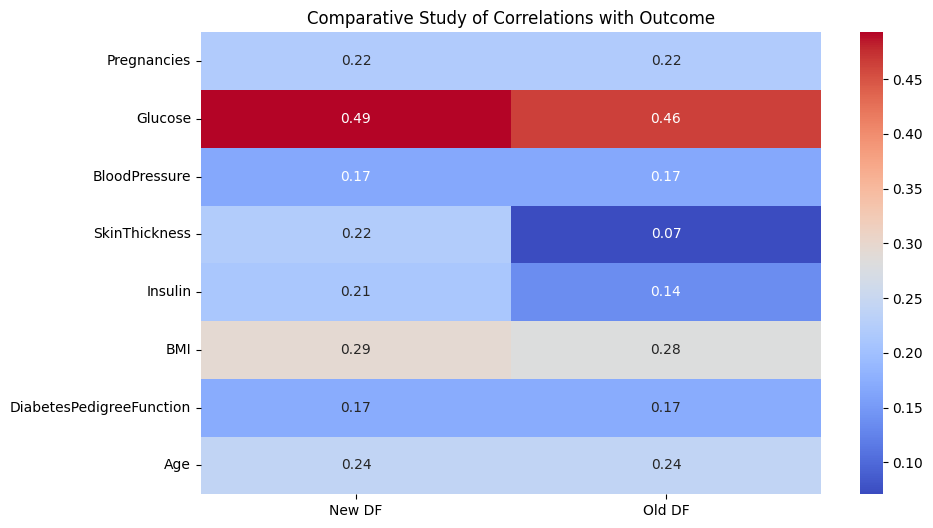

In [21]:
def impute_median(df):
    # Calculate medians
    median_insulin = df.loc[df['Insulin'] != 0, 'Insulin'].median()
    median_glucose = df.loc[df['Glucose'] != 0, 'Glucose'].median()
    median_bmi = df.loc[df['BMI'] != 0, 'BMI'].median()
    median_skin_thickness = df.loc[df['SkinThickness'] != 0, 'BMI'].median()

    new_df = df.copy()
    
    # Impute 0 values
    new_df.loc[new_df['Insulin'] == 0, 'Insulin'] = median_insulin
    new_df.loc[new_df['SkinThickness'] == 0, 'SkinThickness'] = median_skin_thickness
    new_df.loc[new_df['Glucose'] == 0, 'Glucose'] = median_glucose
    new_df.loc[new_df['BMI'] == 0, 'BMI'] = median_bmi

    return new_df

df_impute_median = impute_median(df)
compare_correlation(df_impute_median, df)

In [64]:
# Define the conditions
conditions = (df['Outcome'] == 0) & (
    (df['Glucose'] > 140) |
    (df['BloodPressure'] > 120) |
    (df['Insulin'] > 500) |
    (df['BMI'] > 60)
)

# Filter the DataFrame based on the conditions
filtered_df = df[conditions]

limit = 50

# Check if the number of rows meeting the conditions is greater than 50
if len(filtered_df) > limit:
    # Randomly select n rows
    rows_to_drop = filtered_df.sample(n=limit, random_state=42).index
else:
    # Select all rows meeting the conditions
    rows_to_drop = filtered_df.index

# Drop the selected rows from the original DataFrame
df = df.drop(rows_to_drop)

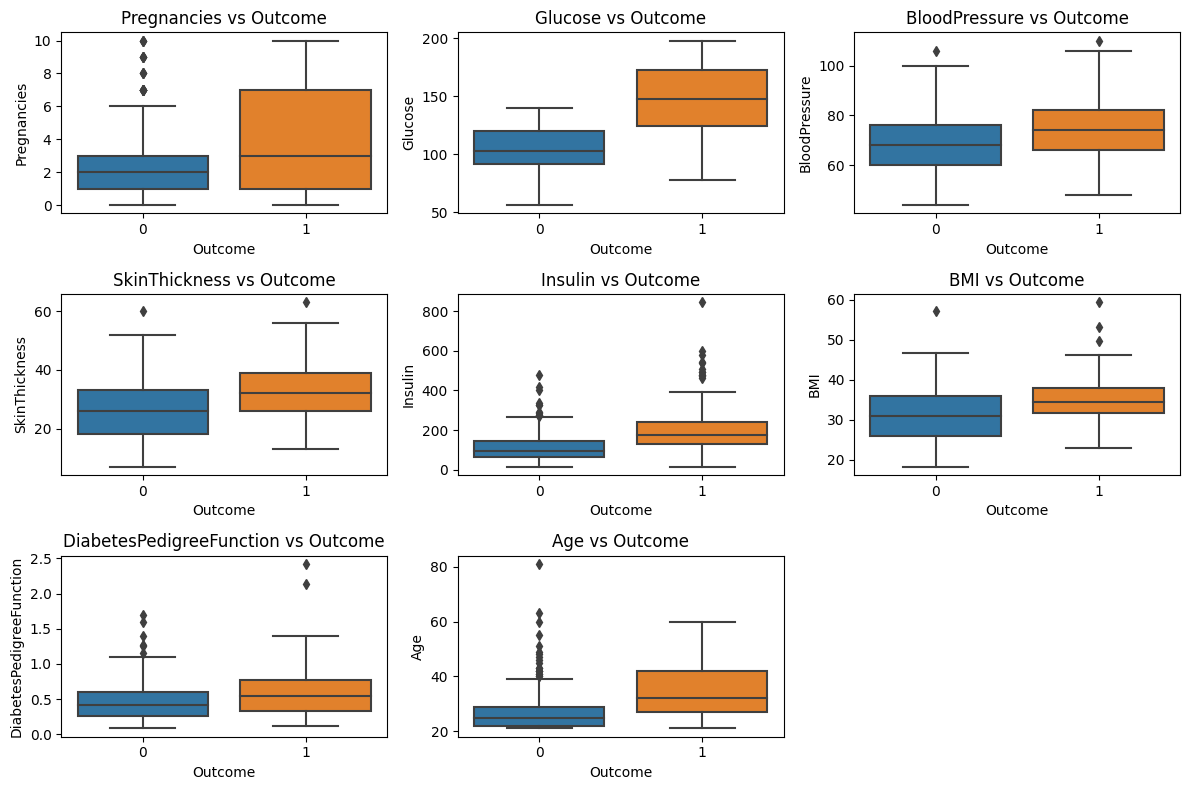

In [65]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    if col=='Outcome' or i==9:
        continue
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} vs Outcome')
plt.tight_layout()
plt.show()

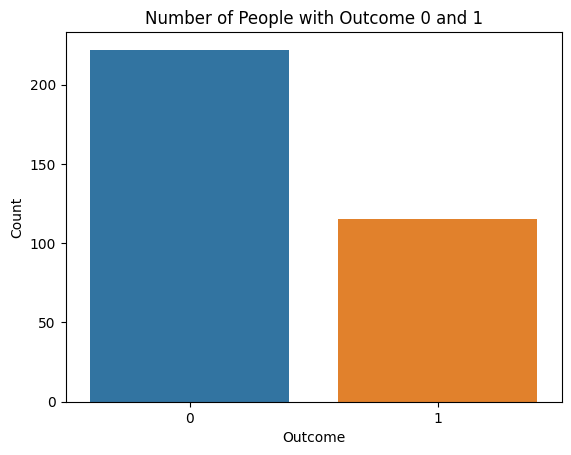

In [66]:
sns.countplot(x='Outcome', data=df)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Number of People with Outcome 0 and 1')
plt.show()

In [67]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [68]:
X.shape

(337, 8)

### SMOTE Analysis

In [69]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(X,y)
X, y =shuffle(X, y, random_state=42)

In [70]:
X.shape

(444, 8)

In [71]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,2,88,58,26,16,28.400000,0.766000,22
137,9,152,78,34,171,34.200000,0.893000,33
72,1,128,98,41,58,32.000000,1.321000,33
365,6,169,86,42,318,38.389890,0.836688,38
73,8,109,76,39,114,27.900000,0.640000,31
...,...,...,...,...,...,...,...,...
106,10,129,76,28,122,35.900000,0.280000,39
270,7,168,88,42,321,38.200000,0.787000,40
348,6,161,54,30,177,30.766138,0.588554,38
435,2,110,71,30,94,36.039865,0.607164,32


## Machine Learning Models

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=101)
abc = AdaBoostClassifier(n_estimators=50, random_state=101)
bc = BaggingClassifier(n_estimators=50, random_state=101)
etc = ExtraTreesClassifier(n_estimators=50, random_state=101)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=101)

In [73]:
models = {
    'svc' : svc,
    'knc' : knc,
    'mnb' : mnb,
    'dtc' : dtc,
    'lrc' : lrc,
    'rfc' : rfc,
    'abc' : abc,
    'bc'  : bc,
    'etc' : etc,
    'gbc' : gbc
}

In [74]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler

require_scalers = ['svc', 'knc', 'dtc']

scaler = StandardScaler()

def train_model(model, model_name, i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)

    if model_name in require_scalers:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)

    if i%100==0:
        print("----------> Model Training : ", model_name, " - i = ", i)
        
    return accuracy, precision

In [75]:
accuracy_scores = []
precision_scores = []
random_states = []

for name, model in models.items():
    for i in range (1000):
        model_accuracy, model_precision = train_model(model, name, i)
        accuracy_scores.append(model_accuracy)
        precision_scores.append(model_precision)
        random_states.append(i)

----------> Model Training :  svc  - i =  0
----------> Model Training :  svc  - i =  100
----------> Model Training :  svc  - i =  200
----------> Model Training :  svc  - i =  300
----------> Model Training :  svc  - i =  400
----------> Model Training :  svc  - i =  500
----------> Model Training :  svc  - i =  600
----------> Model Training :  svc  - i =  700
----------> Model Training :  svc  - i =  800
----------> Model Training :  svc  - i =  900
----------> Model Training :  knc  - i =  0
----------> Model Training :  knc  - i =  100
----------> Model Training :  knc  - i =  200
----------> Model Training :  knc  - i =  300
----------> Model Training :  knc  - i =  400
----------> Model Training :  knc  - i =  500
----------> Model Training :  knc  - i =  600
----------> Model Training :  knc  - i =  700
----------> Model Training :  knc  - i =  800
----------> Model Training :  knc  - i =  900
----------> Model Training :  mnb  - i =  0
----------> Model Training :  mnb  - i =

In [76]:
performance_df = pd.DataFrame({'Algorithm':list(models.keys())*1000, 'Accuracy':accuracy_scores, 'Precision':precision_scores, 'Random State':random_states})

In [77]:
performance_df[performance_df['Accuracy'] > 0.8].sort_values(
    by=['Precision', 'Accuracy'],
    ascending=[False, False]
)[:50]

,Algorithm,Accuracy,Precision,Random State
5580,svc,0.977528,1.000000,580
8982,mnb,0.977528,1.000000,982
7723,dtc,0.966292,1.000000,723
5031,knc,0.955056,1.000000,31
5965,rfc,0.955056,1.000000,965
7427,bc,0.955056,1.000000,427
7067,bc,0.943820,1.000000,67
7259,gbc,0.943820,1.000000,259
8501,knc,0.943820,1.000000,501
8612,mnb,0.932584,1.000000,612


In [79]:
performance_df[performance_df['Precision'] > 0.85].sort_values('Accuracy', ascending=False)[:15]

,Algorithm,Accuracy,Precision,Random State
5580,svc,0.977528,1.000000,580
8982,mnb,0.977528,1.000000,982
7723,dtc,0.966292,1.000000,723
6501,knc,0.966292,0.956522,501
5723,dtc,0.966292,0.977273,723
9454,lrc,0.966292,0.977273,454
8331,knc,0.966292,0.976744,331
9331,knc,0.955056,0.954545,331
5031,knc,0.955056,1.000000,31
8316,abc,0.955056,0.976744,316


### Model Fine Tuning

In [27]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=101)
svc = SVC(kernel="sigmoid", gamma=1.0)
bc = BaggingClassifier(n_estimators=50, random_state=101)
dtc = DecisionTreeClassifier(max_depth=5)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=101)
knc = KNeighborsClassifier()
mnb = MultinomialNB()

In [28]:
models = {
    'etc': etc,
    'svc' : svc,
    'bc' : bc,
    'dtc' : dtc,
    'gbc' : gbc,
    'knc' : knc,
    'mnb' : mnb, 
}

In [32]:
from sklearn.model_selection import GridSearchCV

untuned_model_data = {
    'etc' : {
        'model': etc,
        'data_random_state': 128
    },
    'svc' : {
        'model': svc,
        'data_random_state': 330
    },
    'bc' : {
        'model': bc,
        'data_random_state': 77
    },
    'dtc' : {
        'model': dtc,
        'data_random_state': 983
    },
    'gbc' : {
        'model': gbc,
        'data_random_state': 49
    },
    'knc' : {
        'model': knc,
        'data_random_state': 371
    },
    'mnb' : {
        'model': mnb,
        'data_random_state': 252
    },
}

param_grid = {
    'lrc': {
        'penalty': ['l1', 'l2', 'none'],
        'C': [0.01, 0.1, 1.0, 10.0, 100.0],
        'max_iter': [100, 200, 300],
    },
    'knc': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [10, 20, 30, 40, 50],
        'p': [1, 2]
    },
    'gbc': {
        'n_estimators': [20, 50, 100],
        'max_depth': [10, 20, 30, 50],
        'min_samples_split': [2, 5, 10],
    },
    'dtc': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['sqrt', 'log2', None],
        'criterion': ['gini', 'entropy'],
    },
    'bc': {
        'n_estimators': [20, 50, 100],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0],
    },
    'etc': {
        'n_estimators': [20, 50, 100],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
    },
    'abc': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'mnb': {
        'alpha': [0.1, 0.5, 1.0],
        'fit_prior': [True, False]
    },
    'rfc': {
        'n_estimators': [20, 50, 100],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
    },
    'svc': {
        'C': [0.1, 1, 10, 25],
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4],
    }
}

require_scalers = ['lrc', 'knc', 'etc']
scaler = StandardScaler()

def get_params_string(params):
    params_arr = []
    for key, value in params.items():
        param_string = key + " : " + str(value)
        params_arr.append(param_string)
    return ", ".join(params_arr)

def tune_model(model, model_name, data_random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=data_random_state, stratify=y)

    if model_name in require_scalers:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    grid=GridSearchCV(model, param_grid[model_name], cv=5, verbose=3)
    grid.fit(X_train, y_train)

    model = grid.best_estimator_
    models[model_name] = model
    
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)

    print("----------> Model Trained: ", model_name)
    
    return accuracy, precision, get_params_string(grid.best_params_)

In [33]:
accuracy_scores = []
precision_scores = []
params = []

for name, model_data in untuned_model_data.items():
    model_accuracy, model_precision, model_params = tune_model(model_data['model'], name, model_data['data_random_state'])
    accuracy_scores.append(model_accuracy)
    precision_scores.append(model_precision)
    params.append(model_params)

finetune_performance_df = pd.DataFrame({'Algorithm':untuned_model_data.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores, 'Params': params})

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=10, min_samples_split=2, n_estimators=20;, score=0.873 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_split=2, n_estimators=20;, score=0.859 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_split=2, n_estimators=20;, score=0.803 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_split=2, n_estimators=20;, score=0.873 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_split=2, n_estimators=20;, score=0.803 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_split=2, n_estimators=50;, score=0.859 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_split=2, n_estimators=50;, score=0.845 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_split=2, n_estimators=50;, score=0.817 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_split=2, n_estimators=50;, score=0.915 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_split=2, n_estimators=50;,

In [34]:
finetune_performance_df.sort_values(
    by=['Precision', 'Accuracy'],
    ascending=[False, False]
)[:50]

,Algorithm,Accuracy,Precision,Params
0,etc,0.966292,1.000000,"max_depth : 30, min_samples_split : 5, n_estim..."
2,bc,0.932584,0.953488,"max_features : 0.7, max_samples : 1.0, n_estim..."
4,gbc,0.898876,0.926829,"max_depth : 20, min_samples_split : 10, n_esti..."
3,dtc,0.865169,0.902439,"criterion : gini, max_depth : 5, max_features ..."
1,svc,0.842697,0.897436,"C : 10, degree : 2, kernel : linear"
5,knc,0.887640,0.857143,"algorithm : auto, leaf_size : 10, n_neighbors ..."
6,mnb,0.606742,0.638889,"alpha : 0.1, fit_prior : True"


## Ensemble Learning Approach

In [80]:
chosen_models = ['rfc', 'bc', 'gbc', 'svc', 'knc']

In [81]:
import numpy as np

# List to store average precisions and accuracies for each random state i
avg_precisions = []
avg_accuracies = []
avg_precisions_per_model = {}
avg_accuracies_per_model = {}

for i in range(1, 1000):    
    train_models = [models[model_name] for model_name in chosen_models]
    accuracies = []
    precisions = []
    
    for model, model_name in zip(train_models, chosen_models):
        accuracy, precision = train_model(model, model_name, i)
        accuracies.append(accuracy)
        precisions.append(precision)
        avg_precisions_per_model.setdefault(model_name, []).append(precision)
        avg_accuracies_per_model.setdefault(model_name, []).append(accuracy)
        
    avg_precision = np.mean(precisions)
    avg_accuracy = np.mean(accuracies)
    avg_precisions.append(avg_precision)
    avg_accuracies.append(avg_accuracy)

# Find the random state i with the highest average precision
best_i = np.argmax(avg_precisions) + 1  # Add 1 because Python is zero-indexed
best_avg_precision = avg_precisions[best_i - 1]
best_avg_accuracy = avg_accuracies[best_i - 1]

print("Best random state i:", best_i)
print("Best average precision:", best_avg_precision)
print("Best average accuracy:", best_avg_accuracy)

for model_name in avg_precisions_per_model:
    avg_precision_model = np.mean(avg_precisions_per_model[model_name])
    avg_accuracy_model = np.mean(avg_accuracies_per_model[model_name])
    print(f"Model: {model_name}, Avg. Precision: {avg_precision_model}, Avg. Accuracy: {avg_accuracy_model}")

----------> Model Training :  rfc  - i =  100
----------> Model Training :  bc  - i =  100
----------> Model Training :  gbc  - i =  100
----------> Model Training :  svc  - i =  100
----------> Model Training :  knc  - i =  100
----------> Model Training :  rfc  - i =  200
----------> Model Training :  bc  - i =  200
----------> Model Training :  gbc  - i =  200
----------> Model Training :  svc  - i =  200
----------> Model Training :  knc  - i =  200
----------> Model Training :  rfc  - i =  300
----------> Model Training :  bc  - i =  300
----------> Model Training :  gbc  - i =  300
----------> Model Training :  svc  - i =  300
----------> Model Training :  knc  - i =  300
----------> Model Training :  rfc  - i =  400
----------> Model Training :  bc  - i =  400
----------> Model Training :  gbc  - i =  400
----------> Model Training :  svc  - i =  400
----------> Model Training :  knc  - i =  400
----------> Model Training :  rfc  - i =  500
----------> Model Training :  bc  - i 

In [82]:
train_predictions_data = {}
test_predictions_data = {}

train_models = [models[model_name] for model_name in chosen_models]

for model, model_name in zip(train_models, chosen_models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=751, stratify=y)
    
    if model_name in require_scalers:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    model.fit(X_train,y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_predictions_data['y_'+model_name]=train_predictions
    test_predictions_data['y_'+model_name]=test_predictions


# Create a DataFrame
train_predictions_df = pd.DataFrame(train_predictions_data)
test_predictions_df = pd.DataFrame(test_predictions_data)

# Add actual values of y to the DataFrame
train_predictions_df['y_actual'] = y_train.values
test_predictions_df['y_actual'] = y_test.values

In [83]:
train_predictions_df

,y_rfc,y_bc,y_gbc,y_svc,y_knc,y_actual
0,0,0,0,1,1,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,1,1,0
4,1,1,1,1,1,1
...,...,...,...,...,...,...
350,1,1,1,1,1,1
351,0,0,0,1,0,0
352,1,1,1,1,1,1
353,0,0,0,0,0,0


In [84]:
X_train = train_predictions_df.drop('y_actual', axis=1)
y_train = train_predictions_df['y_actual']

X_test = test_predictions_df.drop('y_actual', axis=1)
y_test = test_predictions_df['y_actual']

In [85]:
X_test

,y_rfc,y_bc,y_gbc,y_svc,y_knc
0,0,0,0,0,0
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,0,0,0,0,0
...,...,...,...,...,...
84,0,0,0,0,1
85,0,0,0,0,0
86,0,0,0,1,0
87,1,1,1,1,1


In [86]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

In [87]:
def build_model(hp):
    model = Sequential()
    model.add(Input(5,))

    for i in range(hp.Int('num_layers', min_value=1, max_value=6)):
        model.add(
            Dense(
                hp.Int('units'+str(i), min_value=2, max_value=64, step=12),
                activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])
            )
        )
        model.add(Dropout(hp.Choice('droupout'+str(i), values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta']),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                 tf.keras.metrics.Precision(thresholds=0.5, name='precision')]
    )

    return model


In [88]:
import keras_tuner as kt

tuner = kt.RandomSearch(
    build_model,
    objective= kt.Objective("val_accuracy", direction="max"),
    max_trials= 40,
    directory= 'tuners',
    project_name= 'diabetes_ensemble_29'
)

Using TensorFlow backend


In [89]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 40 Complete [00h 00m 01s]
val_accuracy: 0.8539325594902039

Best val_accuracy So Far: 0.8764045238494873
Total elapsed time: 00h 00m 25s


In [74]:
tuner.results_summary()

Results summary
Results in tuners/diabetes_ensemble_29
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 36 summary
Hyperparameters:
num_layers: 1
units0: 14
activation0: tanh
droupout0: 0.4
optimizer: nadam
units1: 26
activation1: tanh
droupout1: 0.0
units2: 2
activation2: tanh
droupout2: 0.2
units3: 2
activation3: tanh
droupout3: 0.0
units4: 62
activation4: sigmoid
droupout4: 0.3
units5: 50
activation5: sigmoid
droupout5: 0.4
Score: 0.9666666388511658

Trial 09 summary
Hyperparameters:
num_layers: 6
units0: 62
activation0: relu
droupout0: 0.3
optimizer: adam
units1: 62
activation1: sigmoid
droupout1: 0.0
units2: 50
activation2: relu
droupout2: 0.5
units3: 14
activation3: sigmoid
droupout3: 0.5
units4: 14
activation4: sigmoid
droupout4: 0.3
units5: 26
activation5: tanh
droupout5: 0.3
Score: 0.9666666388511658

Trial 29 summary
Hyperparameters:
num_layers: 3
units0: 14
activation0: relu
droupout0: 0.5
optimizer: nadam
units1: 50
activation1: relu
droupout1: 

In [75]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 14,
 'activation0': 'tanh',
 'droupout0': 0.4,
 'optimizer': 'nadam',
 'units1': 26,
 'activation1': 'tanh',
 'droupout1': 0.0,
 'units2': 2,
 'activation2': 'tanh',
 'droupout2': 0.2,
 'units3': 2,
 'activation3': 'tanh',
 'droupout3': 0.0,
 'units4': 62,
 'activation4': 'sigmoid',
 'droupout4': 0.3,
 'units5': 50,
 'activation5': 'sigmoid',
 'droupout5': 0.4}

In [90]:
model = tuner.get_best_models(num_models=1)[0]

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                300       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.005,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [107]:
history = model.fit(X_train, y_train, epochs=100, initial_epoch=10, validation_data=(X_test, y_test), callbacks=callback)

Epoch 11/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5741 - accuracy: 0.7669 - precision: 0.7340 - val_loss: 0.5419 - val_accuracy: 0.9667 - val_precision: 0.9773
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7809 - precision: 0.7660 - val_loss: 0.5276 - val_accuracy: 0.9667 - val_precision: 0.9773
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.8118 - precision: 0.7761 - val_loss: 0.5131 - val_accuracy: 0.9667 - val_precision: 0.9773
Epoch 14/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.8371 - precision: 0.7970 - val_loss: 0.4991 - val_accuracy: 0.9667 - val_precision: 0.9773
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.8652 - precision: 0.8495 - val_loss: 0.4849 - val_accuracy: 0.9667 - val_precision: 0.9773
Epoch 16/100
12/12 [==============================] - 0s 2ms/step - lo

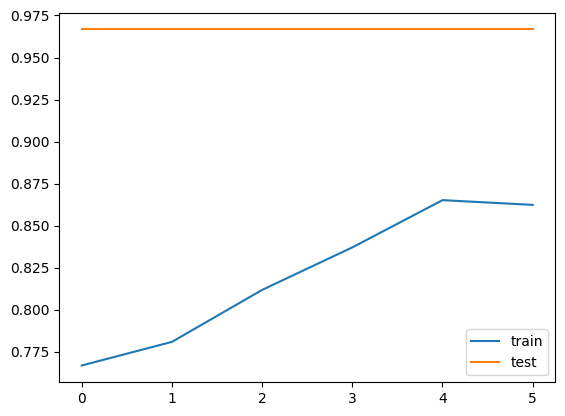

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

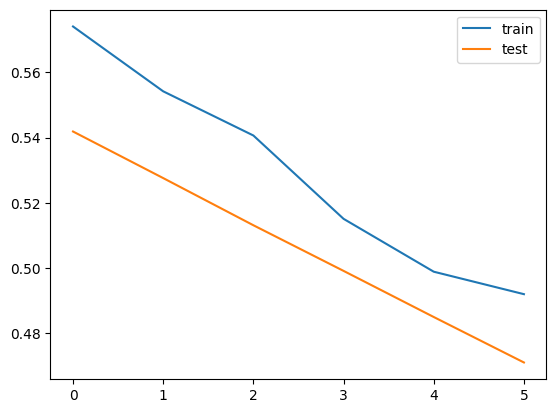

In [109]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

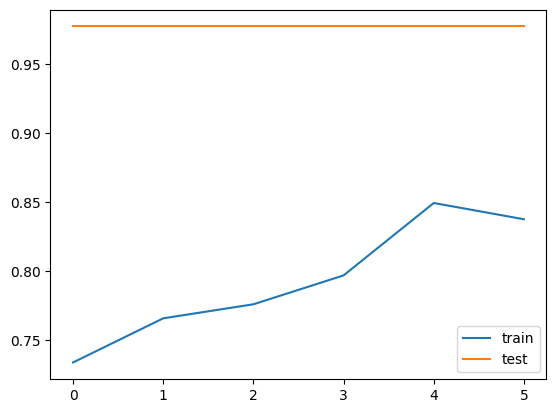

In [110]:
plt.plot(history.history['precision'], label='train')
plt.plot(history.history['val_precision'], label='test')
plt.legend()

In [111]:
predictions = model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [112]:
predictions

array([[0.61946034],
       [0.61946034],
       [0.427554  ],
       [0.427554  ],
       [0.61946034],
       [0.61946034],
       [0.427554  ],
       [0.61946034],
       [0.427554  ],
       [0.61946034],
       [0.54327863],
       [0.427554  ],
       [0.427554  ],
       [0.427554  ],
       [0.61946034],
       [0.427554  ],
       [0.5636054 ],
       [0.61946034],
       [0.52890956],
       [0.427554  ],
       [0.61946034],
       [0.481517  ],
       [0.61946034],
       [0.427554  ],
       [0.427554  ],
       [0.578051  ],
       [0.427554  ],
       [0.427554  ],
       [0.427554  ],
       [0.427554  ],
       [0.61946034],
       [0.427554  ],
       [0.578051  ],
       [0.61946034],
       [0.427554  ],
       [0.427554  ],
       [0.61946034],
       [0.61946034],
       [0.427554  ],
       [0.61946034],
       [0.61946034],
       [0.427554  ],
       [0.427554  ],
       [0.5180624 ],
       [0.427554  ],
       [0.61946034],
       [0.61946034],
       [0.427

In [113]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_threshold = 0
best_accuracy = 0

# Iterate over different threshold values
for threshold in np.arange(0.2, 0.8, 0.01):

    binary_predictions = np.where(predictions > threshold, 1, 0)

    accuracy = accuracy_score(y_test, binary_predictions)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("Best Threshold:", best_threshold)

Best Threshold: 0.49000000000000027


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.98      0.96      0.97        45

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



Text(0.5, 1.0, 'Confusion Matrix')

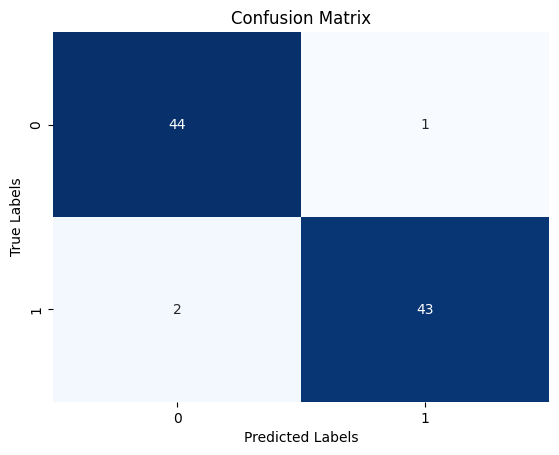

In [114]:
binary_predictions = np.where(predictions > best_threshold, 1,0)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, binary_predictions))

conf_matrix = confusion_matrix(y_test, binary_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')